

ГРАФИК ФУНКЦИИ




ДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ X
"оч. малая" на интервале [-1.57; -1.18)
"малая" на интервале [-1.18; -0.39)
"средняя" на интервале [-0.39; 0.39)
"большая" на интервале [0.39; 1.18)
"оч. большая" на интервале [1.18; 1.57)


ДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ Y
"оч. малая" на интервале [-1.57; -1.18)
"малая" на интервале [-1.18; -0.39)
"средняя" на интервале [-0.39; 0.39)
"большая" на интервале [0.39; 1.18)
"оч. большая" на интервале [1.18; 1.57)


ДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ Z
"оч. малая" на интервале [-1; -0.69)
"малая" на интервале [-0.69; -0.06)
"средняя" на интервале [-0.06; 0.56)
"большая" на интервале [0.56; 1.19)
"оч. большая" на интервале [1.19; 1.5)


БАЗА ПРАВИЛ
ЕСЛИ     x = оч. малая          и     y = оч. малая          ТО     F = малая               (F = -1.0)
ЕСЛИ     x = оч. малая          и     y = малая              ТО     F = малая               (F = -1.0)
ЕСЛИ     x = оч. малая          и     y = средняя            ТО     F 

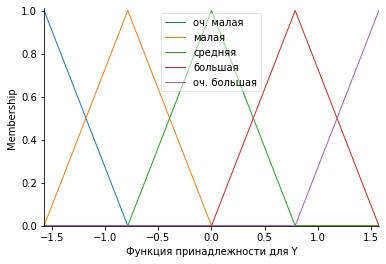

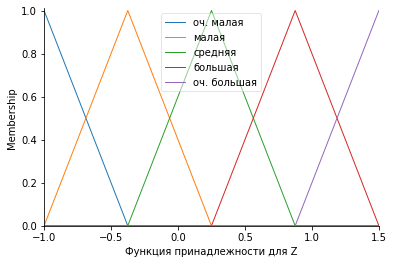

In [26]:
!pip install -U scikit-fuzzy

import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FuncFormatter
import numpy as np
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tabulate import tabulate

NUM_RANGES = 5

terms5 = [
    'оч. малая',
    'малая',
    'средняя',
    'большая',
    'оч. большая'
]

terms7 = [
    'кр. малая',
    'оч. малая',
    'малая',
    'средняя',
    'большая',
    'оч. большая',
    'кр. большая'    
]

terms9 = [
    'кр. малая',
    'оч. малая',
    'малая',
    'ум. малая',
    'средняя',
    'ум. большая',
    'большая',
    'оч. большая',
    'кр. большая'    
]

terms11 = [
    'кр. малая',
    'оч. малая',
    'малая',
    'ум. малая',
    'ниже сред.',
    'средняя',
    'выше сред.',
    'ум. большая',
    'большая',
    'оч. большая',
    'кр. большая'    
]

def term_to_singleton(term, numranges):
    if numranges == 5:
        return terms5.index(term) - ((numranges - 1) / 2)
    elif numranges == 7:
        return terms7.index(term) - ((numranges - 1) / 2)
    elif numranges == 9:
        return terms9.index(term) - ((numranges - 1) / 2)
    elif numranges == 11:
        return terms11.index(term) - ((numranges - 1) / 2)
    else:
        sys.exit('error: numranges must be in [5, 7, 9, 11]')
                

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-math.pi/2, math.pi/2, 0.25)
Y = np.arange(-math.pi/2, math.pi/2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = Y * np.cos(X)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1, 1.5)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('z = y * cos(x)')

print("\n\nГРАФИК ФУНКЦИИ")
plt.show()

def build_intervals_and_plot_membership(start, end, numranges, caption):
    terms = []
    if numranges == 5:
        terms = terms5
    elif numranges == 7:
        terms = terms7
    elif numranges == 9:
        terms = terms9
    elif numranges == 11:
        terms = terms11
    else: 
        sys.exit('error: numranges must be in [5, 7, 9, 11]')
        return
    step = (abs(start) + abs(end)) / (numranges - 1)
    func = ctrl.Antecedent(np.arange(start, end + step, step), caption)
    ranges = [None] * numranges
    for i in np.arange(0, numranges, 1):
        triangle = []
        if i == 0:
            triangle = [start, start, start + step]
            ranges[i] = {}
            ranges[i]['start'] = triangle[1]
            ranges[i]['end'] = triangle[2] - (step / 2)
        else:
            triangle = [
                (i - 1) * step - abs(start),
                i * step - abs(start),
                (i + 1) * step - abs(start)
            ]
            if numranges - 1 == i:
                ranges[i] = {}
                ranges[i]['start'] = triangle[0] + (step / 2)
                ranges[i]['end'] = triangle[1]
            else:
                ranges[i] = {}
                ranges[i]['start'] = triangle[0] + (step / 2)
                ranges[i]['end'] = triangle[2] - (step / 2)
        ranges[i]['term'] = terms[i]
        print(f'"{terms[i]}" на интервале [{round(ranges[i]["start"], 2)}; {round(ranges[i]["end"], 2)})')
        func[terms[i]] = fuzz.trimf(func.universe, triangle)
    func.view()
    return ranges

print("\n\nДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ X")
rangesX = build_intervals_and_plot_membership(-math.pi/2, math.pi/2, NUM_RANGES, 'Функция принадлежности для X')
print("\n\nДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ Y")
rangesY = build_intervals_and_plot_membership(-math.pi/2, math.pi/2, NUM_RANGES, 'Функция принадлежности для Y')
print("\n\nДАННЫЕ ДЛЯ ПОСТРОЕНИЯ ФУНКЦИИ ПРИНАДЛЕЖНОСТИ Z")
rangesZ = build_intervals_and_plot_membership(-1, 1.5, NUM_RANGES, 'Функция принадлежности для Z')

print("\n\nБАЗА ПРАВИЛ")

for rangeX in rangesX:
    for rangeY in rangesY:
        x = (rangeX['start'] + rangeX['end']) / 2
        y = (rangeY['start'] + rangeY['end']) / 2
        z = y * math.cos(x)
        for rangeZ in rangesZ:
            if rangeZ['start'] < z and z < rangeZ['end']:
                print('ЕСЛИ     x = {0: <14}     и     y = {1: <14}     ТО     F = {2: <14}      (F = {3})'
                      .format(rangeX["term"], rangeY["term"], rangeZ["term"], term_to_singleton(rangeZ['term'], NUM_RANGES)))

print("\n\nФУНКЦИИ ПРИНАДЛЕЖНОСТИ")
